<a href="https://colab.research.google.com/github/IsaacFigNewton/SMIED/blob/main/SMIED_Test_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get, import dependencies

In [1]:
!pip install git+https://github.com/IsaacFigNewton/SMIED.git
# !pip install -e .
!python -m spacy download en_core_web_lg

  Cloning https://github.com/IsaacFigNewton/SMIED.git to /tmp/pip-req-build-t7xdiz8g
  Running command git clone --filter=blob:none --quiet https://github.com/IsaacFigNewton/SMIED.git /tmp/pip-req-build-t7xdiz8g
  Resolved https://github.com/IsaacFigNewton/SMIED.git to commit 428d59fde8399939e231f69c2c49be212cd065cd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for smied: filename=smied-0.1.0-py3-none-any.whl size=18411 sha256=eaa892b2c31a7fa020b8423d9f01004dce805a9516a8e3bffff48784c511c870
  Stored in directory: /tmp/pip-ephem-wheel-cache-2qsm1kl4/wheels/83/68/7f/dcad1fe24256264258d5b7c7b2f68ee6d180bf7a2d8c54954b
  Created wheel for importlib: filename=importlib-1.0.4-py3-none-any.whl size=5850 sha256=bc312d2a95f750c0428fa06f05feb2d64c52175f8ff9a0925bfd100dd5182c5c
  Stored in directory: /root/.cache/pip/wheels/40/41/c4/d925a53b7b7e75a65369e

# Config

In [2]:
import json
import spacy
from spacy import displacy
import networkx as nx
from smied import SemanticMetagraph, PatternMatcher

In [3]:
nlp = spacy.load('en_core_web_lg')
text = "The quick brown fox jumps over the lazy dog."
doc = nlp(text)

# Construct a dependency KG from the SpaCy token info
See [RDF schema spec docs](https://www.w3.org/TR/rdf-schema/) for edge relation guidance

In [4]:
G = SemanticMetagraph(doc)

## Visualize the KG

/usr/local/lib/python3.12/dist-packages/smied/SemanticMetagraph.py:260: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


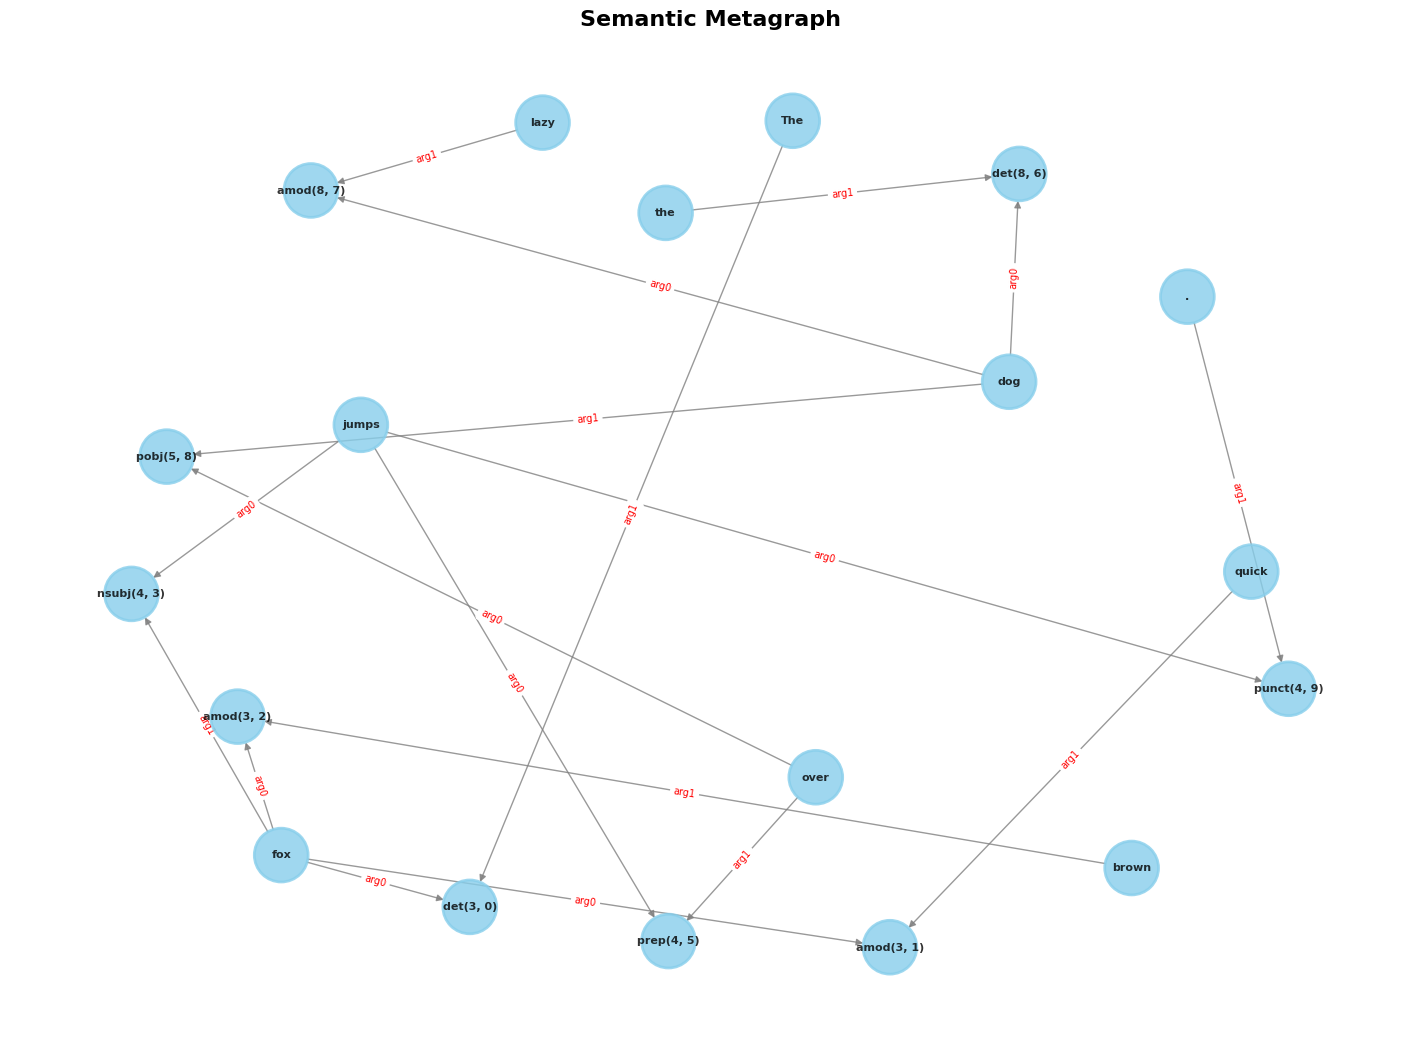

In [5]:
G.plot()

## List nodes, edges

In [6]:
G_json = G.to_json()
print("metaverts")
print(G_json['metaverts'])

metaverts
[
    {
        "id": 0,
        "type": "atomic",
        "value": "The",
        "metadata": {
            "text": "The",
            "pos": "DET",
            "head": 3,
            "lemma": "the",
            "idx": 0,
            "case": "title",
            "type": "word",
            "Definite": [
                "Def"
            ],
            "PronType": [
                "Art"
            ]
        }
    },
    {
        "id": 1,
        "type": "atomic",
        "value": "quick",
        "metadata": {
            "text": "quick",
            "pos": "ADJ",
            "head": 3,
            "lemma": "quick",
            "idx": 1,
            "case": "lower",
            "type": "word",
            "Degree": [
                "Pos"
            ]
        }
    },
    {
        "id": 2,
        "type": "atomic",
        "value": "brown",
        "metadata": {
            "text": "brown",
            "pos": "ADJ",
            "head": 3,
            "lemma": "brown",
  

## List other stuff

# Get implied relations from phrase/clause-level structures

In [7]:
matcher = PatternMatcher(G)

## List the default patterns (ensure they loaded correctly)

In [8]:
print(json.dumps(matcher.pattern_loader.patterns, indent=4))

{
    "lexical": {
        "passive_voice": {
            "description": "Find passive voice constructions",
            "pattern": [
                {
                    "mv_type": "atomic",
                    "pos": [
                        "NOUN",
                        "PROPN"
                    ]
                },
                {
                    "mv_type": "directed_relation",
                    "relation_type": "nsubjpass",
                    "requires_reference": true
                },
                {
                    "mv_type": "atomic",
                    "pos": [
                        "VERB"
                    ]
                }
            ]
        },
        "compound_predicate": {
            "description": "Find compound predicates",
            "pattern": [
                {
                    "mv_type": "atomic",
                    "pos": [
                        "NOUN",
                        "PROPN"
                    ]
                }

## Try adding a new pattern to the list for matching

In [9]:
# Updated pattern using new metavertex format
pattern = {
    "name": "test_metavertex_pattern",
    "pattern": [
        {"mv_type": "atomic", "pos": ["NOUN", "PROPN"]},
        {"mv_type": "directed_relation", "relation_type": "nsubj", "requires_reference": True},
        {"mv_type": "atomic", "pos": ["VERB"]}
    ]
}
matcher.add_pattern(
    name=pattern["name"],
    pattern=pattern["pattern"],
    description="A test metavertex pattern for matching subject-verb relationships",
    category="custom"
)

In [10]:
test_pattern_as_string = json.dumps(
    matcher.pattern_loader.patterns["custom"],
    indent=4,
    default=str
)
print(test_pattern_as_string)

{
    "test_metavertex_pattern": {
        "description": "A test metavertex pattern for matching subject-verb relationships",
        "pattern": [
            {
                "mv_type": "atomic",
                "pos": [
                    "NOUN",
                    "PROPN"
                ]
            },
            {
                "mv_type": "directed_relation",
                "relation_type": "nsubj",
                "requires_reference": true
            },
            {
                "mv_type": "atomic",
                "pos": [
                    "VERB"
                ]
            }
        ]
    }
}


# Attempt path matching on semantic KG

In [11]:
displacy.render(doc, style="dep", jupyter=True)

# General Analysis

In [12]:
# Test metavertex pattern matching
print("=== Metavertex Structure Analysis ===")
analysis = matcher.analyze_metavertex_patterns()
print(f"Total metavertices: {analysis['total_metaverts']}")
print(f"Atomic count: {analysis['atomic_count']}")
print(f"Directed relations: {analysis['directed_relation_count']}")
print(f"Relation types: {analysis['relation_types']}")
print(f"POS distribution: {analysis['pos_distribution']}")
print()

print("=== Testing Metavertex Basic Patterns ===")
# Test some basic metavertex patterns
try:
    atomic_nouns = matcher("metavertex_basic", "atomic_noun")
    print(f"Found {len(atomic_nouns)} atomic noun matches:")
    for match in atomic_nouns[:3]:  # Show first 3
        print(f"  {match}")
    print()

    directed_relations = matcher("metavertex_basic", "directed_relation")
    print(f"Found {len(directed_relations)} directed relation matches:")
    for match in directed_relations[:3]:  # Show first 3
        print(f"  {match}")
    print()
except KeyError as e:
    print(f"Pattern not found: {e}")

print("=== Testing Custom Metavertex Pattern ===")
custom_matches = matcher("custom", "test_metavertex_pattern")
print(f"Found {len(custom_matches)} custom pattern matches:")
for match in custom_matches:
    print(f"  {match}")
print()

print("=== All Pattern Summary ===")
all_matches = matcher.get_pattern_summary()

=== Metavertex Structure Analysis ===
Total metavertices: 19
Atomic count: 10
Directed relations: 9
Relation types: {'det': 2, 'amod': 3, 'nsubj': 1, 'prep': 1, 'punct': 1, 'pobj': 1}
POS distribution: {'DET': 2, 'ADJ': 3, 'PROPN': 1, 'VERB': 1, 'ADP': 1, 'NOUN': 1, 'PUNCT': 1}

=== Testing Metavertex Basic Patterns ===
Found 2 atomic noun matches:
  {'indices': [3], 'metaverts': [('fox', {'text': 'fox', 'pos': 'PROPN', 'head': 4, 'lemma': 'fox', 'idx': 3, 'case': 'lower', 'type': 'word', 'Number': ['Sing']})], 'summary': 'fox'}
  {'indices': [8], 'metaverts': [('dog', {'text': 'dog', 'pos': 'NOUN', 'head': 5, 'lemma': 'dog', 'idx': 8, 'case': 'lower', 'type': 'word', 'Number': ['Sing']})], 'summary': 'dog'}

Found 9 directed relation matches:
  {'indices': [10], 'metaverts': [((3, 0), {'relation': 'det', 'rel_pos': 'before'})], 'summary': '[det]'}
  {'indices': [11], 'metaverts': [((3, 1), {'relation': 'amod', 'rel_pos': 'before'})], 'summary': '[amod]'}
  {'indices': [12], 'metaverts

In [14]:
# Additional metavertex analysis and pattern testing
print("=== Finding Specific Metavertex Types ===")

# Find atomic metavertices with specific POS tags
nouns = matcher.find_atomic_metavertices(pos="NOUN")
print(f"Found {len(nouns)} NOUN metavertices: {nouns}")

verbs = matcher.find_atomic_metavertices(pos="VERB")
print(f"Found {len(verbs)} VERB metavertices: {verbs}")

# Find relation metavertices
nsubj_relations = matcher.find_relation_metavertices(relation_type="nsubj")
print(f"Found {len(nsubj_relations)} nsubj relations: {nsubj_relations}")

dobj_relations = matcher.find_relation_metavertices(relation_type="dobj")
print(f"Found {len(dobj_relations)} dobj relations: {dobj_relations}")

print("\n=== Metavertex Chains ===")
# Get chains starting from first atomic metavertex
if nouns:
    chains = matcher.get_metavertex_chain(nouns[0], max_depth=2)
    print(f"Chains starting from metavertex {nouns[0]}: {chains}")

print("\n=== Detailed Metavertex Structure ===")
print("Metavertices:")
for i, mv in G.metaverts.items():
    mv_content, mv_metadata = mv if len(mv) == 2 else (mv[0], {})
    print(f"  {i}: {mv_content} | {mv_metadata}")

=== Finding Specific Metavertex Types ===
Found 1 NOUN metavertices: [8]
Found 1 VERB metavertices: [4]
Found 1 nsubj relations: [13]
Found 0 dobj relations: []

=== Metavertex Chains ===
Chains starting from metavertex 8: [[8, 16], [8, 17], [8, 18]]

=== Detailed Metavertex Structure ===
Metavertices:
  0: The | {'text': 'The', 'pos': 'DET', 'head': 3, 'lemma': 'the', 'idx': 0, 'case': 'title', 'type': 'word', 'Definite': ['Def'], 'PronType': ['Art']}
  1: quick | {'text': 'quick', 'pos': 'ADJ', 'head': 3, 'lemma': 'quick', 'idx': 1, 'case': 'lower', 'type': 'word', 'Degree': ['Pos']}
  2: brown | {'text': 'brown', 'pos': 'ADJ', 'head': 3, 'lemma': 'brown', 'idx': 2, 'case': 'lower', 'type': 'word', 'Degree': ['Pos']}
  3: fox | {'text': 'fox', 'pos': 'PROPN', 'head': 4, 'lemma': 'fox', 'idx': 3, 'case': 'lower', 'type': 'word', 'Number': ['Sing']}
  4: jumps | {'text': 'jumps', 'pos': 'VERB', 'head': 4, 'lemma': 'jump', 'idx': 4, 'case': 'lower', 'type': 'word', 'Number': ['Sing'], '